# 결측치 수정

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import value_counts

titanic = sns.load_dataset('titanic')
# print(titanic.head())

titanic.to_csv('titanic.csv', index = False)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [73]:

titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [74]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [75]:

titanic['embarked'] = titanic['embarked'].fillna('S')
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [76]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [77]:
titanic['deck'] = titanic['deck'].fillna('C')
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [78]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [79]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

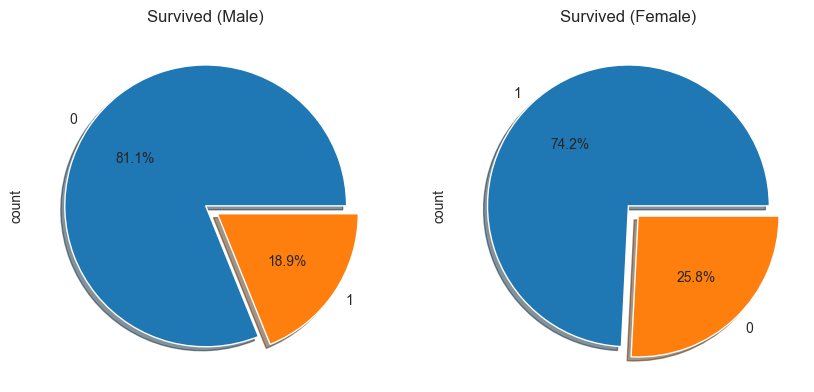

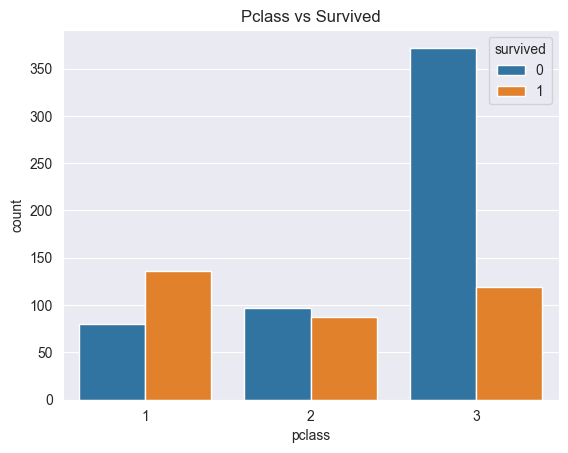

In [80]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1, 2, figsize = (10, 5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

sns.countplot(data=titanic, x='pclass', hue='survived')
plt.title('Pclass vs Survived')
plt.show()

In [ ]:
titanic_corr = titanic.corr(method = 'pearson', numeric_only = True)
titanic_corr

In [82]:
titanic_corr.to_csv('titanic_corr.csv')

In [83]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053259

In [84]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849625

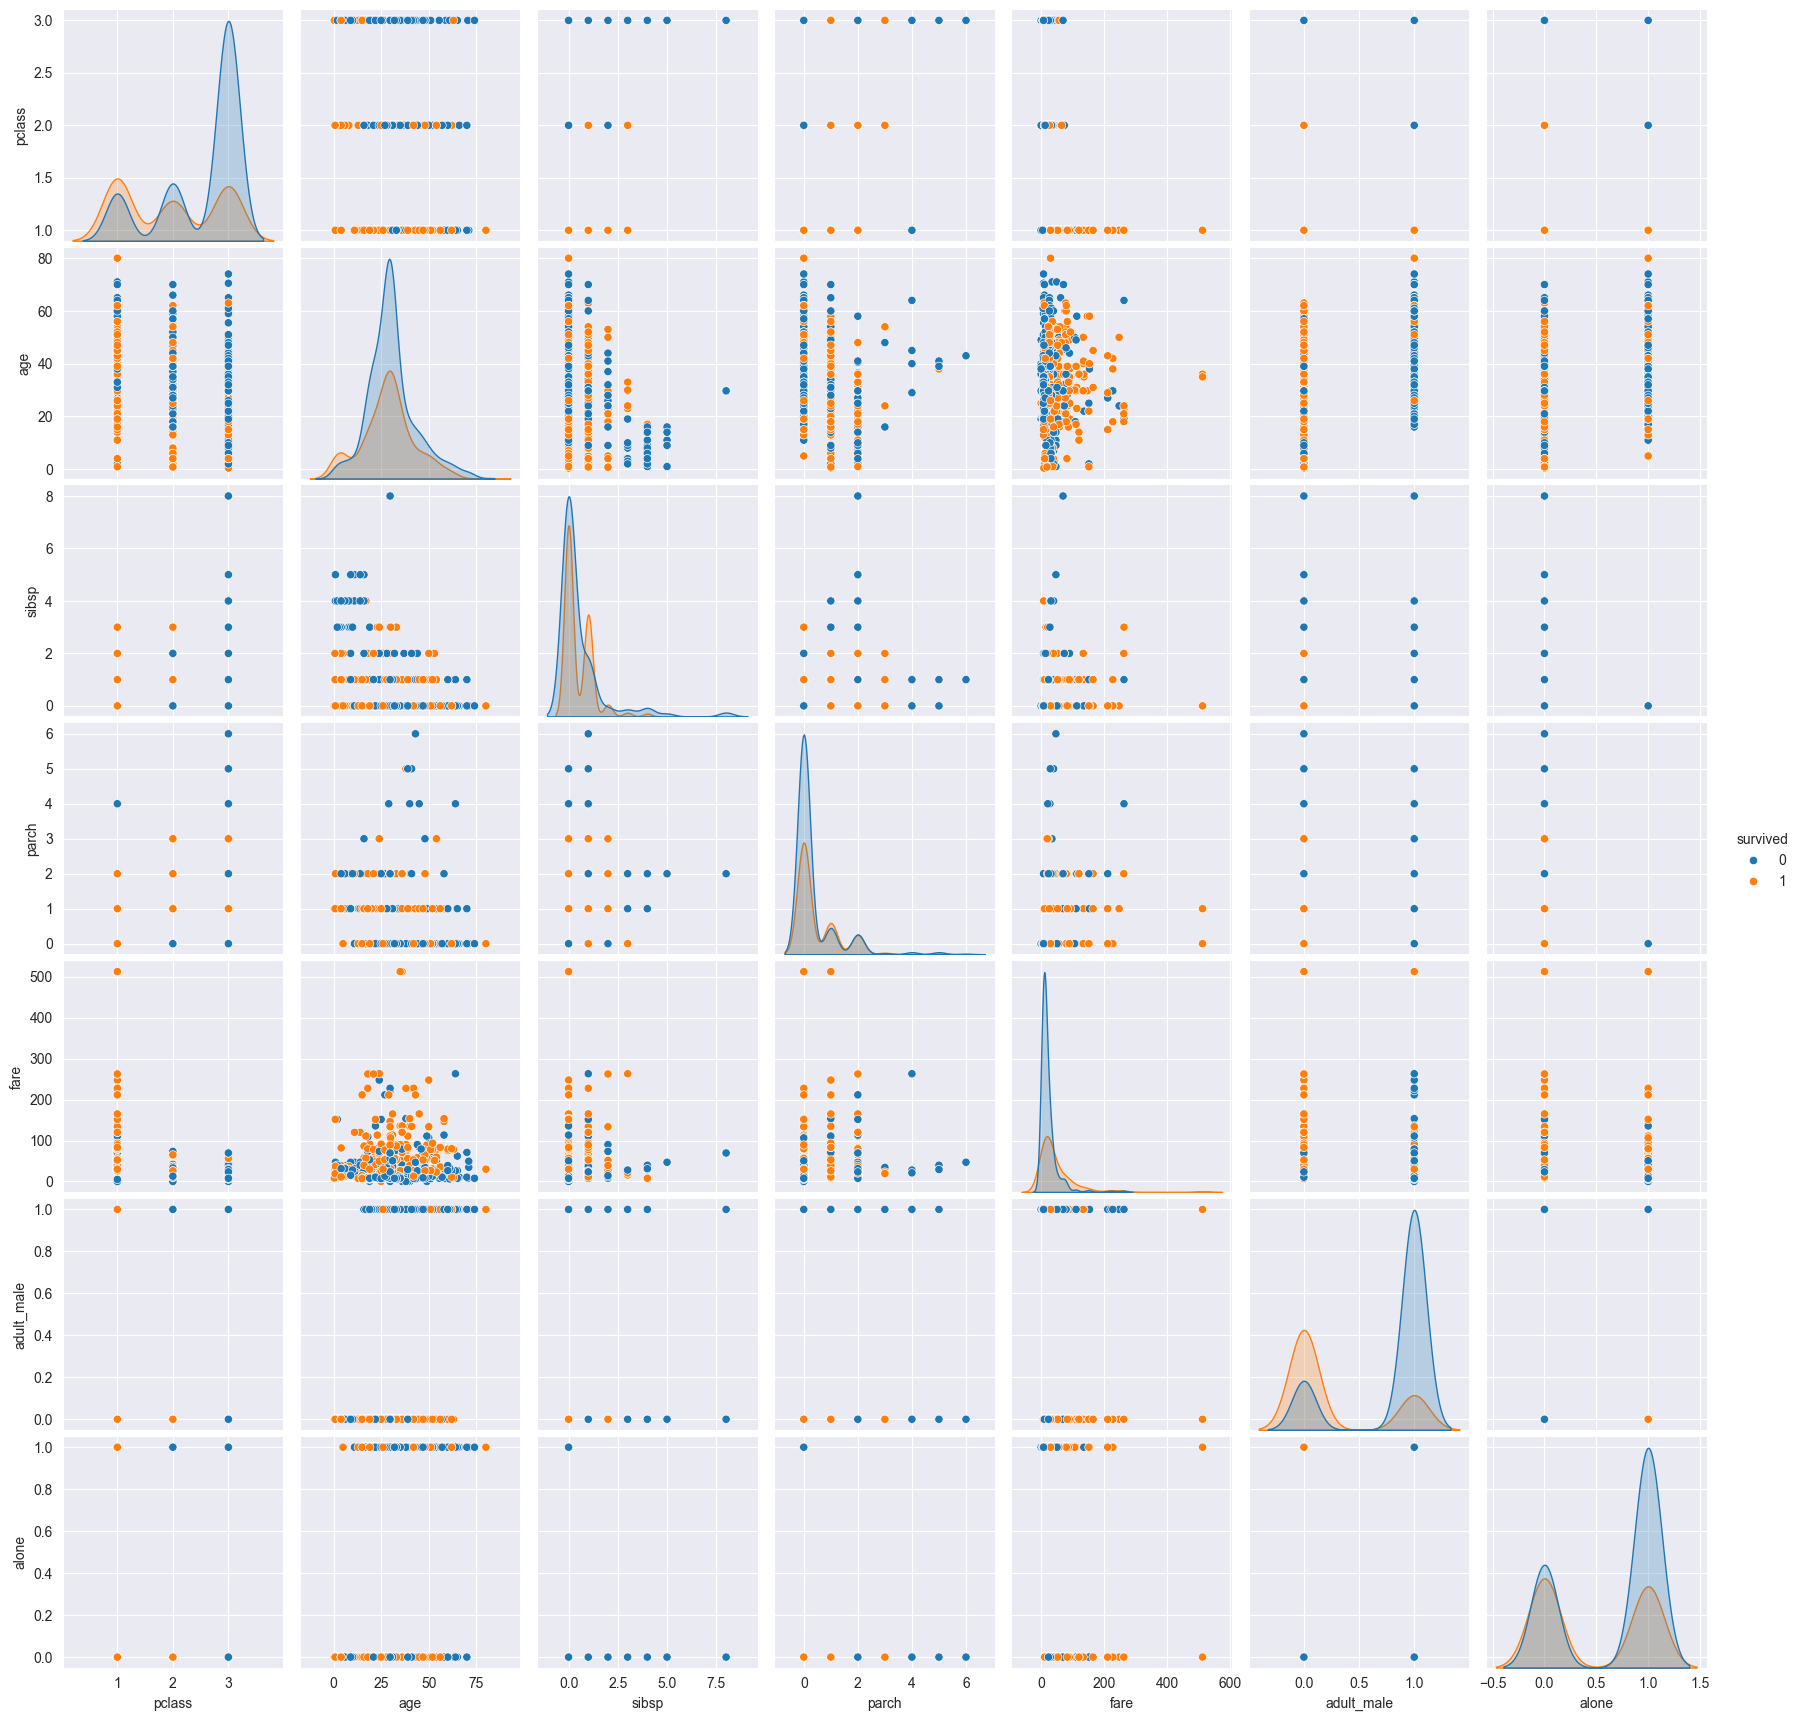

In [86]:
sns.pairplot(titanic, hue = 'survived')
plt.show()

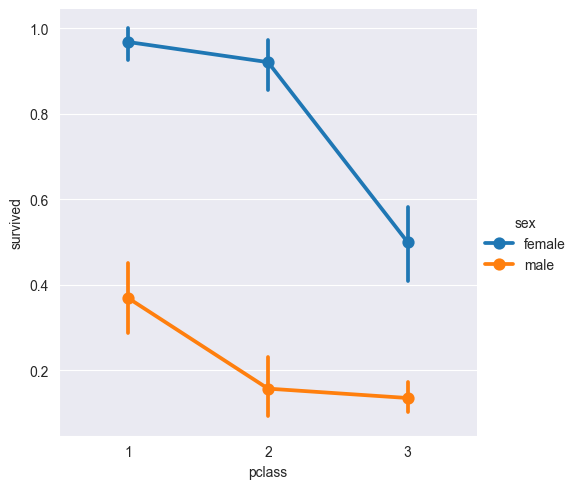

In [88]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()

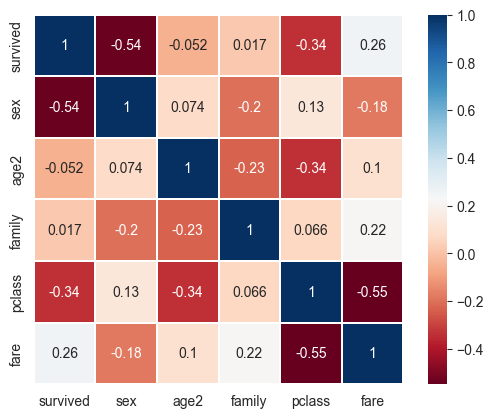

In [89]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

titanic['age2'] = titanic['age'].apply(category_age)
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1
titanic.to_csv('titanic3.csv', index = False)
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax
= 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True,
annot_kws = {"size": 10})
plt.show()